<img src="http://defence.az/photos/2019/06/1559682789.jpg" width="240" height="360" />

# WW2 (World War II) Weather Conditions

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Preprocessing the data, Data Visualization & Data preparation for modelling](#section3)
    - 3.1 [Data Preprocessing](#section301)<br>
    - 3.2 [Data Visualization](#section302)<br>
    - 3.3 [Preparation of Weather data for modeling](#section303)<br>
    - 3.4 [Preparing train and test data set i.e X and Y1,Y2, Y3](#section304)<br>
    - 3.5 [Splitting X and Y1/Y2 into training and test datasets.](#section305)<br>
4. [Model building](#section4)<br>
    - 4.1 [Linear Regression model](#section401)<br>
    - 4.2 [Using the Model for Prediction](#section402)<br>
    - 4.3 [Model Evaluation using Mean Absolute Error (MAE)](#section403)<br>
    - 4.4 [Model Evaluation using Root Mean Squared Error (RMSE)](#section404)<br>
    - 4.5 [Model Evaluation using Rsquared value.](#section405)<br>
    - 4.6 [Model Evaluation using Adjusted R2](#section406)<br>
5. [Plotting predicted vs. actuals](#section5)<br>


<a id=section1></a>

### 1. Problem Statement

The goal is to __understand Weather Conditions__ during WW2 through EDA and build an ML model that can __predict weather Condtions__ of days during which areal boming invasions are planned.


<a id=section2></a>

### 2. Data Loading and Description

<a id=section201></a>

- Load the Data  (we use multiple data sources).
    - Aerial Bombing Operations in WW2 : Shortly, this data includes bombing operations. For example, USA who use ponte olivo airfield     bomb Germany (Berlin) with A36 air craft in 1945.
    - Wether Conditions in WW2 : Shortly, weather conditions during ww2. For example, according to george town weather station, average temperature is 23.88 in 1/7/1942.This data set has 2 subset in it. 
        - First one includes weather station locations like country, latitude and longitude.
        - Second one includes measured min, max and mean temperatures from weather stations.

In [4]:
#### Importing packages                                          

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
import plotly.graph_objs as go # plotly graphical object

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
print(os.listdir("C:/Users/91949/Downloads/Hemanth/Weather Conditions in WW2"))
# import warnings library
import warnings        
# ignore filters
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.
plt.style.use('ggplot') # style of plots. ggplot is one of the most used style, I also like it.
# Any results you write to the current directory are saved as output.

['.ipynb_checkpoints', '.library.json', 'operations.csv', 'README.md', 'script.pdf', 'Summary of Weather.csv', 'Untitled.ipynb', 'Weather Station Locations.csv', 'WW2 Weather Conditions using RF.ipynb', 'WW2 Weather Conditions using RF_1.ipynb']


#### Importing the Dataset

In [5]:
# Aerial bombing data
aerial = pd.read_csv("C:/Users/91949/Downloads/Hemanth/Weather Conditions in WW2/operations.csv")
# Weather sation location data that includes locations like country, latitude and longitude.
weather_station_location = pd.read_csv("C:/Users/91949/Downloads/Hemanth/Weather Conditions in WW2/Weather Station Locations.csv")
# Weather data that includes measured min, max and mean temperatures etc.
weather = pd.read_csv("C:/Users/91949/Downloads/Hemanth/Weather Conditions in WW2/Summary of Weather.csv")

#### Data Description

a.Operations Data

In [6]:
aerial.head(1)

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,...,Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID
0,1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN


- Aerial bombing Data description:
    - Mission Date: Date of mission
    - Theater of Operations: Region in which active military operations are in progress; "the army was in the field awaiting action"; Example: "he served in the Vietnam theater for three years"
    - Country: Country that makes mission or operation like USA
    - Air Force: Name or id of air force unity like 5AF
    - Aircraft Series: Model or type of aircraft like B24
    - Callsign: Before bomb attack, message, code, announcement, or tune that is broadcast by radio.
    - Takeoff Base: Takeoff airport name like Ponte Olivo Airfield
    - Takeoff Location: takeoff region Sicily
    - Takeoff Latitude: Latitude of takeoff region
    - Takeoff Longitude: Longitude of takeoff region
    - Target Country: Target country like Germany
    - Target City: Target city like Berlin
    - Target Type: Type of target like city area
    - Target Industry: Target industy like town or urban
    - Target Priority: Target priority like 1 (most)
    - Target Latitude: Latitude of target
    - Target Longitude: Longitude of target


b.Weather Station Locations

In [7]:
weather_station_location.head(1)

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.65


- Weather station location:
    - WBAN: Weather station number
    - NAME: weather station name
    - STATE/COUNTRY ID: acronym of countries
    - Latitude: Latitude of weather station
    - Longitude: Longitude of weather station


c. Summary of Weather

In [8]:
weather.head(1)

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Weather:
    - STA: eather station number (WBAN)
    - Date: Date of temperature measurement
    - MeanTemp: Mean temperature

<a id=section3></a>

## 3. Preprocessing the data, Data Visualization & Data preparation for modelling

<a id=section301></a>

### 3.1 Data preprocessing

a. Operations data Preprocessing

In [10]:
aerial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178281 entries, 0 to 178280
Data columns (total 46 columns):
Mission ID                               178281 non-null int64
Mission Date                             178281 non-null object
Theater of Operations                    175123 non-null object
Country                                  126494 non-null object
Air Force                                126444 non-null object
Unit ID                                  50913 non-null object
Aircraft Series                          178165 non-null object
Callsign                                 21 non-null object
Mission Type                             47186 non-null object
Takeoff Base                             3383 non-null object
Takeoff Location                         3338 non-null object
Takeoff Latitude                         2981 non-null object
Takeoff Longitude                        2980 non-null float64
Target ID                                127406 non-null object
Target 

- Aerial Bombing data includes a lot of NaN value. Instead of usign them, I drop some NaN values. It does not only remove the uncertainty but it also easa visualization process.
    - Rows that need to be droped
        - Drop countries that are NaN
        - Drop if target longitude is NaN
    - Columns that need to be dropped
        - Drop if takeoff longitude is NaN
        - Drop unused features

In [11]:
# drop countries that are NaN
aerial = aerial[pd.isnull(aerial.Country)==False]
# drop if target longitude is NaN
aerial = aerial[pd.isnull(aerial['Target Longitude'])==False]
# Drop if takeoff longitude is NaN
aerial = aerial[pd.isnull(aerial['Takeoff Longitude'])==False]
# drop unused features
drop_list = ['Mission ID','Unit ID','Target ID','Altitude (Hundreds of Feet)','Airborne Aircraft',
             'Attacking Aircraft', 'Bombing Aircraft', 'Aircraft Returned',
             'Aircraft Failed', 'Aircraft Damaged', 'Aircraft Lost',
             'High Explosives', 'High Explosives Type','Mission Type',
             'High Explosives Weight (Pounds)', 'High Explosives Weight (Tons)',
             'Incendiary Devices', 'Incendiary Devices Type',
             'Incendiary Devices Weight (Pounds)',
             'Incendiary Devices Weight (Tons)', 'Fragmentation Devices',
             'Fragmentation Devices Type', 'Fragmentation Devices Weight (Pounds)',
             'Fragmentation Devices Weight (Tons)', 'Total Weight (Pounds)',
             'Total Weight (Tons)', 'Time Over Target', 'Bomb Damage Assessment','Source ID']
aerial.drop(drop_list, axis=1,inplace = True)
aerial = aerial[ aerial.iloc[:,8]!="4248"] # drop this takeoff latitude 
aerial = aerial[ aerial.iloc[:,9]!=1355]   # drop this takeoff longitude

In [12]:
aerial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2555 entries, 0 to 178080
Data columns (total 17 columns):
Mission Date             2555 non-null object
Theater of Operations    2555 non-null object
Country                  2555 non-null object
Air Force                2505 non-null object
Aircraft Series          2528 non-null object
Callsign                 10 non-null object
Takeoff Base             2555 non-null object
Takeoff Location         2555 non-null object
Takeoff Latitude         2555 non-null object
Takeoff Longitude        2555 non-null float64
Target Country           2499 non-null object
Target City              2552 non-null object
Target Type              602 non-null object
Target Industry          81 non-null object
Target Priority          230 non-null object
Target Latitude          2555 non-null float64
Target Longitude         2555 non-null float64
dtypes: float64(3), object(14)
memory usage: 359.3+ KB


b. Weather Station Locations data Preprocessing

In [13]:
weather_station_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 8 columns):
WBAN                161 non-null int64
NAME                161 non-null object
STATE/COUNTRY ID    161 non-null object
LAT                 161 non-null object
LON                 161 non-null object
ELEV                161 non-null int64
Latitude            161 non-null float64
Longitude           161 non-null float64
dtypes: float64(2), int64(2), object(4)
memory usage: 10.1+ KB


In [14]:
# what we will use only
weather_station_location = weather_station_location.loc[:,["WBAN","NAME","STATE/COUNTRY ID","Latitude","Longitude"] ]
weather_station_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
WBAN                161 non-null int64
NAME                161 non-null object
STATE/COUNTRY ID    161 non-null object
Latitude            161 non-null float64
Longitude           161 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 6.4+ KB


c. Summary of Weather data

In [15]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
STA            119040 non-null int64
Date           119040 non-null object
Precip         119040 non-null object
WindGustSpd    532 non-null float64
MaxTemp        119040 non-null float64
MinTemp        119040 non-null float64
MeanTemp       119040 non-null float64
Snowfall       117877 non-null object
PoorWeather    34237 non-null object
YR             119040 non-null int64
MO             119040 non-null int64
DA             119040 non-null int64
PRCP           117108 non-null object
DR             533 non-null float64
SPD            532 non-null float64
MAX            118566 non-null float64
MIN            118572 non-null float64
MEA            118542 non-null float64
SNF            117877 non-null object
SND            5563 non-null float64
FT             0 non-null float64
FB             0 non-null float64
FTI            0 non-null float64
ITH            0 non-null float64

In [16]:
# what we will use only
weather = weather.loc[:,["STA","Date","MeanTemp"] ]
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 3 columns):
STA         119040 non-null int64
Date        119040 non-null object
MeanTemp    119040 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ MB


<a id=section302></a>

### 3.2. Data Visualization

- Lets start with basics of visualization that is understanding data.
    - How many country which attacks
    - Top target countries
    - Top 10 aircraft series
    - Takeoff base locations (Attack countries)
    - Target locations
    - Bombing paths
    - Theater of Operations
    - Weather station locations

In [17]:
print(aerial['Country'].value_counts())                    #How many country which attacks

USA              1895
GREAT BRITAIN     544
NEW ZEALAND       102
SOUTH AFRICA       14
Name: Country, dtype: int64


In [18]:
print(aerial['Target Country'].value_counts()[:10])       #Top target countries

ITALY      1104
BURMA       335
LIBYA       272
TUNISIA     113
GREECE       87
EGYPT        80
JAPAN        71
CHINA        52
SICILY       46
GERMANY      41
Name: Target Country, dtype: int64


In [19]:
print(aerial['Aircraft Series'].value_counts())            # Aircraft Series

A36              990
B25              416
B24              337
BLEN             180
LIB              145
WELL             129
B17              119
PV-1 VENTURA      70
WHIT              32
HALI              18
SBD DAUNTLESS     16
TBF AVENGER       16
P40               14
LYSANDER          10
HUDSON             9
A24                7
LB30               5
JU86               5
SWORD              4
BATT               3
HAMP               1
236/330 WINGS      1
B26                1
Name: Aircraft Series, dtype: int64


In [20]:
aerial.head(3)

,Mission Date,Theater of Operations,Country,Air Force,Aircraft Series,Callsign,Takeoff Base,Takeoff Location,Takeoff Latitude,Takeoff Longitude,Target Country,Target City,Target Type,Target Industry,Target Priority,Target Latitude,Target Longitude
0,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,SPADAFORA,NaN,NaN,NaN,38.22,15.37
2,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,COSENZA,NaN,NaN,NaN,39.27,16.25
3,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,GIOJA TAURO,NaN,NaN,NaN,38.43,15.90


In [21]:
# Takeoff base locations (Attacjk countries)
aerial["color"] = ""
aerial.color[aerial.Country == "USA"] = "rgb(0,116,217)"
aerial.color[aerial.Country == "GREAT BRITAIN"] = "rgb(255,65,54)"
aerial.color[aerial.Country == "NEW ZEALAND"] = "rgb(133,20,75)"
aerial.color[aerial.Country == "SOUTH AFRICA"] = "rgb(255,133,27)"

data = [dict(
    type='scattergeo',
    lon = aerial['Takeoff Longitude'],
    lat = aerial['Takeoff Latitude'],
    hoverinfo = 'text',
    text = "Country: " + aerial.Country + " Takeoff Location: "+aerial["Takeoff Location"]+" Takeoff Base: " + aerial['Takeoff Base'],
    mode = 'markers',
    marker=dict(
        sizemode = 'area',
        sizeref = 1,
        size= 10 ,
        line = dict(width=1,color = "white"),
        color = aerial["color"],
        opacity = 0.7),
)]
layout = dict(
    title = 'Countries Take Off Bases ',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, projection=dict(type='mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [22]:
# Bombing paths
# trace1
airports = [ dict(
        type = 'scattergeo',
        lon = aerial['Takeoff Longitude'],
        lat = aerial['Takeoff Latitude'],
        hoverinfo = 'text',
        text = "Country: " + aerial.Country + " Takeoff Location: "+aerial["Takeoff Location"]+" Takeoff Base: " + aerial['Takeoff Base'],
        mode = 'markers',
        marker = dict( 
            size=5, 
            color = aerial["color"],
            line = dict(
                width=1,
                color = "white"
            )
        ))]
# trace2
targets = [ dict(
        type = 'scattergeo',
        lon = aerial['Target Longitude'],
        lat = aerial['Target Latitude'],
        hoverinfo = 'text',
        text = "Target Country: "+aerial["Target Country"]+" Target City: "+aerial["Target City"],
        mode = 'markers',
        marker = dict( 
            size=1, 
            color = "red",
            line = dict(
                width=0.5,
                color = "red"
            )
        ))]
        
# trace3
flight_paths = []
for i in range( len( aerial['Target Longitude'] ) ):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            lon = [ aerial.iloc[i,9], aerial.iloc[i,16] ],
            lat = [ aerial.iloc[i,8], aerial.iloc[i,15] ],
            mode = 'lines',
            line = dict(
                width = 0.7,
                color = 'black',
            ),
            opacity = 0.6,
        )
    )
    
layout = dict(
    title = 'Bombing Paths from Attacker Country to Target ',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, projection=dict(type='mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
)
    
fig = dict( data=flight_paths + airports+targets, layout=layout )
iplot( fig )

In [23]:
#Theater of Operations
print(aerial['Theater of Operations'].value_counts())

MTO            1802
CBI             425
PTO             247
ETO              44
EAST AFRICA      37
Name: Theater of Operations, dtype: int64


- Theater of Operations:
    - ETO: European Theater of Operations
    - PTO: Pasific Theater of Operations
    - MTO: Mediterranean Theater of Operations
    - CBI: China-Burma-India Theater of Operations
    - EAST AFRICA: East Africa Theater of Operations
- As you ca see from bombing paths, most of the bombing attack is done in Mediterranean theater of operations. 

In [24]:
# weather station locations

data = [dict(
    type='scattergeo',
    lon = weather_station_location.Longitude,
    lat = weather_station_location.Latitude,
    hoverinfo = 'text',
    text = "Name: " + weather_station_location.NAME + " Country: " + weather_station_location["STATE/COUNTRY ID"],
    mode = 'markers',
    marker=dict(
        sizemode = 'area',
        sizeref = 1,
        size= 8 ,
        line = dict(width=1,color = "white"),
        color = "blue",
        opacity = 0.7),
)]
layout = dict(
    title = 'Weather Station Locations ',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, projection=dict(type='mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Lets focus USA and BURMA war, In this war USA bomb BURMA( KATHA city) from 1942 to 1945.The closest weather station to this war is BINDUKURI and it has temperature record from 1943 to 1945.Now lets visualize this situation. But before visualization, we need to make date features date time object.

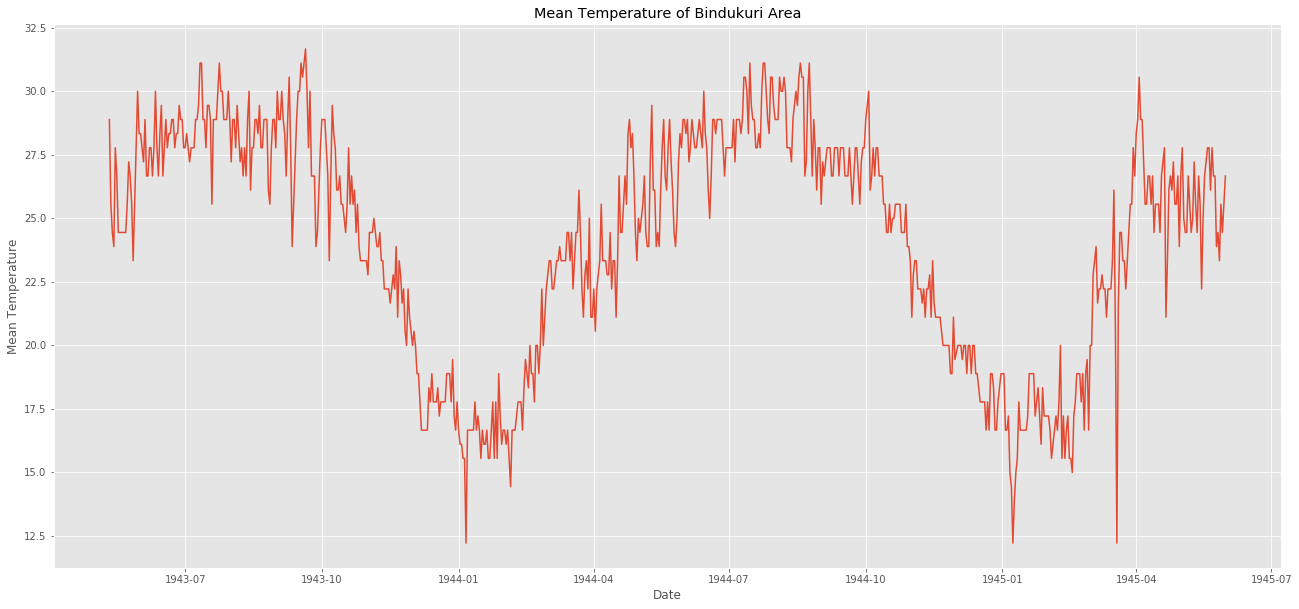

In [25]:
weather_station_id = weather_station_location[weather_station_location.NAME == "BINDUKURI"].WBAN 
weather_bin = weather[weather.STA == 32907]
weather_bin["Date"] = pd.to_datetime(weather_bin["Date"])
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp)
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

As you can see, we have temperature measurement from 1943 to 1945.Temperature ossilates between 12 and 32 degrees. Temperature of winter months is colder than temperature of summer months.

In [26]:
aerial = pd.read_csv("C:/Users/91949/Downloads/Hemanth/Weather Conditions in WW2/operations.csv")
aerial["year"] = [ each.split("/")[2] for each in aerial["Mission Date"]]
aerial["month"] = [ each.split("/")[0] for each in aerial["Mission Date"]]
aerial = aerial[aerial["year"]>="1943"]
aerial = aerial[aerial["month"]>="8"]

aerial["Mission Date"] = pd.to_datetime(aerial["Mission Date"])

attack = "USA"
target = "BURMA"
city = "KATHA"

aerial_war = aerial[aerial.Country == attack]
aerial_war = aerial_war[aerial_war["Target Country"] == target]
aerial_war = aerial_war[aerial_war["Target City"] == city]

In [27]:
# Visualization of boming tempratures during 1943 to 1945
liste = []
aa = []
for each in aerial_war["Mission Date"]:
    dummy = weather_bin[weather_bin.Date == each]
    liste.append(dummy["MeanTemp"].values)
aerial_war["dene"] = liste
for each in aerial_war.dene.values:
    aa.append(each[0])

# Create a trace
trace = go.Scatter(
    x = weather_bin.Date,
    mode = "lines",
    y = weather_bin.MeanTemp,
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
    name = "Mean Temperature"
)
trace1 = go.Scatter(
    x = aerial_war["Mission Date"],
    mode = "markers",
    y = aa,
    marker = dict(color = 'rgba(16, 0, 200, 1)'),
    name = "Bombing temperature"
)
layout = dict(title = 'Mean Temperature --- Bombing Dates and Mean Temperature at this Date')
data = [trace,trace1]

fig = dict(data = data, layout = layout)
iplot(fig)

Green line is mean temperature that is measured in Bindukuri. Blue markers are bombing dates and bombing date temperature.
As it can be seen from plot, USA bomb at high temperatures.The question is that can we predict future weather and according to this prediction can we know whether bombing will be done or not.In order to answer this question lets first start with time series prediction.

<a id=section303></a>

### 3.3 Preparation of Weather data for modeling

In [29]:
#loadoriginal weather data
weather_data = pd.read_csv("C:/Users/91949/Downloads/Hemanth/Weather Conditions in WW2/Summary of Weather.csv")
# what we will use only
weather_data = weather_data.loc[:,["STA","Date","Precip","MaxTemp","MinTemp","MeanTemp","YR","MO","DA"] ]
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 9 columns):
STA         119040 non-null int64
Date        119040 non-null object
Precip      119040 non-null object
MaxTemp     119040 non-null float64
MinTemp     119040 non-null float64
MeanTemp    119040 non-null float64
YR          119040 non-null int64
MO          119040 non-null int64
DA          119040 non-null int64
dtypes: float64(3), int64(4), object(2)
memory usage: 8.2+ MB


In [30]:
weather_data['Date']=pd.to_datetime(weather_data['Date']) #Converting date format
weather_data.iloc[1,1]

Timestamp('1942-07-02 00:00:00')

In [31]:
weather_data['Yesterday']=weather_data['Date']+pd.Timedelta(days=-1) #Additing additioanl column yesterday
weather_data.iloc[1,[1,2,3,4,9]]

Date         1942-07-02 00:00:00
Precip                         0
MaxTemp                  28.8889
MinTemp                  21.6667
Yesterday    1942-07-01 00:00:00
Name: 1, dtype: object

In [32]:
weather_data1=weather_data.loc[:,["STA","Date","Yesterday"]]
#merging weather_data1 with weather_data for importing yesterdays values
weather_data1=pd.merge(weather_data1,weather_data,how='left',left_on=['STA','Yesterday'],right_on=['STA','Date'])
#renameing the columns
weather_date1=weather_data1.rename(columns={'Precip':'Y_Precip','MaxTemp':'Y_MaxTemp','MinTemp':'Y_MinTemp','MeanTemp':'Y_MeanTemp','YR':'Y_YR','MO':'Y_MO','DA':'Y_DA'},inplace=True)
#keeping only required columns
weather_data1=weather_data1.loc[:,["STA","Date_x","Yesterday_x","Y_Precip","Y_MaxTemp","Y_MinTemp","Y_MeanTemp","Y_YR","Y_MO","Y_DA"]]
#merging weather_data1 with weather_data for todays values
weather_data1=pd.merge(weather_data1,weather_data,how='left',left_on=['STA','Date_x'],right_on=['STA','Date'])
#keeping only required columns
weather_data1=weather_data1.drop(['Date','Precip','YR','MO','DA','Yesterday','MeanTemp'],axis=1)
weather_data1=weather_data1.dropna()

In [33]:
weather_data1.head()

,STA,Date_x,Yesterday_x,Y_Precip,Y_MaxTemp,Y_MinTemp,Y_MeanTemp,Y_YR,Y_MO,Y_DA,MaxTemp,MinTemp
1,10001,1942-07-02,1942-07-01,1.016,25.555556,22.222222,23.888889,42.0,7.0,1.0,28.888889,21.666667
2,10001,1942-07-03,1942-07-02,0,28.888889,21.666667,25.555556,42.0,7.0,2.0,26.111111,22.222222
3,10001,1942-07-04,1942-07-03,2.54,26.111111,22.222222,24.444444,42.0,7.0,3.0,26.666667,22.222222
4,10001,1942-07-05,1942-07-04,2.54,26.666667,22.222222,24.444444,42.0,7.0,4.0,26.666667,21.666667
5,10001,1942-07-06,1942-07-05,0,26.666667,21.666667,24.444444,42.0,7.0,5.0,26.666667,21.666667


<a id=section304></a>

### 3.4 Preparing X and Y1,Y2, Y3

In [34]:
Data=weather_data1.drop(['Date_x','Yesterday_x'],axis=1)
Data['Y_Precip']=Data['Y_Precip'].replace('T',0)

In [35]:
#Feature Scaling or Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(Data)
Data_s=scaler.transform(Data)

In [36]:
Data=pd.DataFrame(Data_s)
Data.columns=["STA","Y_Precip","Y_MaxTemp","Y_MinTemp","Y_MeanTemp","Y_YR","Y_MO","Y_DA","MaxTemp","MinTemp"]
Data.head()

,STA,Y_Precip,Y_MaxTemp,Y_MinTemp,Y_MeanTemp,Y_YR,Y_MO,Y_DA,MaxTemp,MinTemp
0,-0.938417,-0.204807,-0.175689,0.531629,0.175707,-1.591642,0.081222,-1.682670,0.209388,0.464722
1,-0.938417,-0.298829,0.209312,0.464626,0.377879,-1.591642,0.081222,-1.568839,-0.111498,0.531713
2,-0.938417,-0.063775,-0.111522,0.531629,0.243098,-1.591642,0.081222,-1.455009,-0.047321,0.531713
3,-0.938417,-0.063775,-0.047355,0.531629,0.243098,-1.591642,0.081222,-1.341178,-0.047321,0.464722
4,-0.938417,-0.298829,-0.047355,0.464626,0.243098,-1.591642,0.081222,-1.227347,-0.047321,0.464722


In [37]:
X=Data.loc[:,["STA","Y_Precip","Y_MaxTemp","Y_MinTemp","Y_MeanTemp","Y_YR","Y_MO","Y_DA"]]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118688 entries, 0 to 118687
Data columns (total 8 columns):
STA           118688 non-null float64
Y_Precip      118688 non-null float64
Y_MaxTemp     118688 non-null float64
Y_MinTemp     118688 non-null float64
Y_MeanTemp    118688 non-null float64
Y_YR          118688 non-null float64
Y_MO          118688 non-null float64
Y_DA          118688 non-null float64
dtypes: float64(8)
memory usage: 7.2 MB


In [38]:
Y1=Data.MaxTemp
Y2=Data.MinTemp
print(Y1.shape,Y2.shape)

(118688,) (118688,)


<a id=section305></a>

### 3.5 Splitting X and Y1/Y2 into training and test datasets.

In [39]:
from sklearn.model_selection import train_test_split

def split(X,Y1,Y2):
    return train_test_split(X,Y1,Y2,test_size=0.20,random_state=1)

X_train,X_test,Y1_train,Y1_test,Y2_train,Y2_test=split(X,Y1,Y2)
print('Train Cases as below')
print('X_train shape:',X_train.shape)
print('Y1_train shape:',Y1_train.shape)
print('Y2_train shape:',Y2_train.shape)
print('\nTest Cases as below')
print('X_test shape:',X_train.shape)
print('Y1_test shape:',Y1_test.shape)
print('Y2_test shape:',Y2_test.shape)

Train Cases as below
X_train shape: (94950, 8)
Y1_train shape: (94950,)
Y2_train shape: (94950,)

Test Cases as below
X_test shape: (94950, 8)
Y1_test shape: (23738,)
Y2_test shape: (23738,)


<a id = section4></a>

## 4. Model building

<a id = section401></a>

### 4.1 Linear Regression model

In [42]:
from sklearn.linear_model import LinearRegression
linreg1 = LinearRegression()
linreg1.fit(X_train,Y1_train)
linreg2 = LinearRegression()
linreg2.fit(X_train,Y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<a id = section402></a>

### 4.2 Using the Model for Prediction

In [44]:
y1_pred_test=linreg1.predict(X_test)
y2_pred_test=linreg2.predict(X_test)

<a id = section403></a>

### 4.3 Model Evaluation using Mean Absolute Error (MAE)

In [45]:
from sklearn import metrics
MAE_test_Mintemp=metrics.mean_absolute_error(Y1_test,y1_pred_test)
MAE_test_Maxtemp=metrics.mean_absolute_error(Y2_test,y2_pred_test)

MAE_test_Mintemp,MAE_test_Maxtemp

(0.15957859312329173, 0.14942458956066373)

<a id = section404></a>

### 4.4 Model Evaluation using Root Mean Squared Error (RMSE)

In [46]:
RMSE_test_Mintemp=metrics.mean_squared_error(Y1_test,y1_pred_test)
RMSE_test_Maxtemp=metrics.mean_squared_error(Y2_test,y2_pred_test)

RMSE_test_Mintemp,RMSE_test_Maxtemp

(0.06361290927336874, 0.05240433951479414)

<a id = section405></a>

### 4.5 Model Evaluation using Rsquared value.

In [47]:
from sklearn.metrics import r2_score
R2_test_Mintemp=r2_score(Y1_test,y1_pred_test)
R2_test_Maxtemp=r2_score(Y2_test,y2_pred_test)

R2_test_Mintemp,R2_test_Maxtemp

(0.9346682149362747, 0.946418363431914)

<a id = section406></a>

### 4.6 Model Evaluation using Adjusted R2

In [49]:
Adj_R2_test_Mintemp=1-((1-R2_test_Mintemp)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
Adj_R2_test_Maxtemp=1-((1-R2_test_Maxtemp)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
Adj_R2_test_Mintemp,Adj_R2_test_Maxtemp

(0.9346461889646573, 0.9464002989078066)

<a id = section5></a>

## 5. Plotting predicted vs. actuals


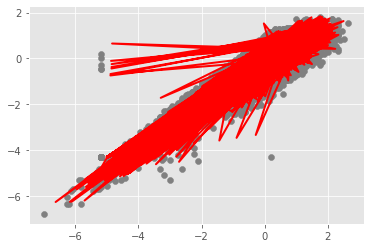

In [50]:
plt.scatter(Y1_test, Y2_test,  color='gray')
plt.plot(y1_pred_test, y2_pred_test, color='red', linewidth=2)
plt.show()

__Observations:__

- This model explains __93%  and 94%__ of the variability in the __Min & Max temperature__ respectively based on input of weather condtions of previous days and location of weather station.